In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-airbnb/processed_df
/kaggle/input/melbourne-airbnb/sentiment_df_eng
/kaggle/input/melbourne-airbnb-open-data/reviews_summary_dec18.csv
/kaggle/input/melbourne-airbnb-open-data/neighbourhoods.geojson
/kaggle/input/melbourne-airbnb-open-data/reviews_dec18.csv
/kaggle/input/melbourne-airbnb-open-data/listings_summary_dec18.csv
/kaggle/input/melbourne-airbnb-open-data/calendar_dec18.csv
/kaggle/input/melbourne-airbnb-open-data/neighbourhoods.csv
/kaggle/input/melbourne-airbnb-open-data/listings_dec18.csv
/kaggle/input/melbourne-airbnb-open-data/cleansed_listings_dec18.csv


**In this notebook we will be focussing on analyzing textual descriptive features to see what insights we can get from them.**



Please go through the analysis for continous descriptive features in my other notebook (https://www.kaggle.com/gauravdiwan/melbourne-airbnb-eda)

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## change default settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)


In [3]:
listings_summary  = pd.read_csv('../input/melbourne-airbnb-open-data/listings_summary_dec18.csv')
reviews = pd.read_csv('../input/melbourne-airbnb-open-data/reviews_dec18.csv')

In [4]:
listings_summary.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213


In [5]:
print("The dataset has {} rows and {} columns.".format(*listings_summary.shape))

The dataset has 22895 rows and 16 columns.


In [6]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


In [7]:
print("The dataset has {} rows and {} columns.".format(*reviews.shape))

The dataset has 486920 rows and 6 columns.


We can get more valuable information by combining both the dataframes as it can provide useful insights with respect to each listing.

In [8]:
df = pd.merge(listings_summary,reviews,left_on='id',right_on='listing_id',how='left')

In [9]:
df.head(1)


,id_x,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365,9835.0,279854.0,2011-05-24,560832.0,Miriam,"Very hospitable, much appreciated.\r\n"


In [10]:
## dropping duplicate columns
df.drop(['listing_id'],axis=1,inplace=True)

In [11]:
df.columns

Index(['id_x', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'id_y', 'date', 'reviewer_id', 'reviewer_name',
       'comments'],
      dtype='object')

In [12]:
## droppping redundant columns --- of no use to our analysis
df.drop(['host_name','neighbourhood_group','last_review','id_y','reviewer_id','reviewer_name'],axis=1,inplace=True)

In [13]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 492162 rows and 15 columns.


In [14]:
## rename columns
df.rename(columns= {'id_x':'id','name':'title' },inplace=True)

In [15]:
df.head(2)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
0,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n"
1,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


Look whether missing values are present or not

In [16]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 


def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
comments,5845,1.2
reviews_per_month,5242,1.1
date,5242,1.1
title,3,0.0


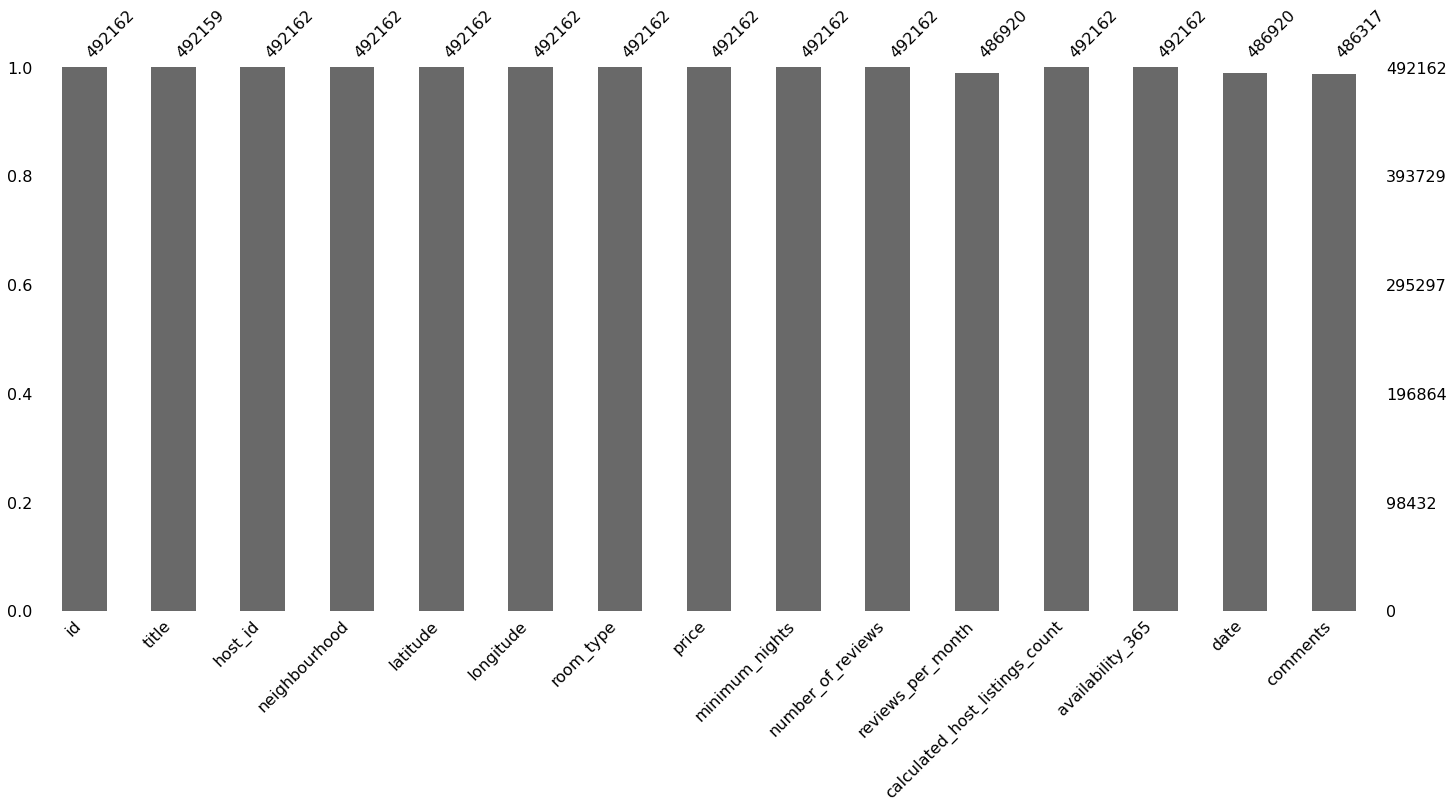

In [18]:
import missingno as msno

msno.bar(df)

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that comments, reviews_per_month,date and title columns have missing values. Next,it would make sense to find out the locations of the missing data.

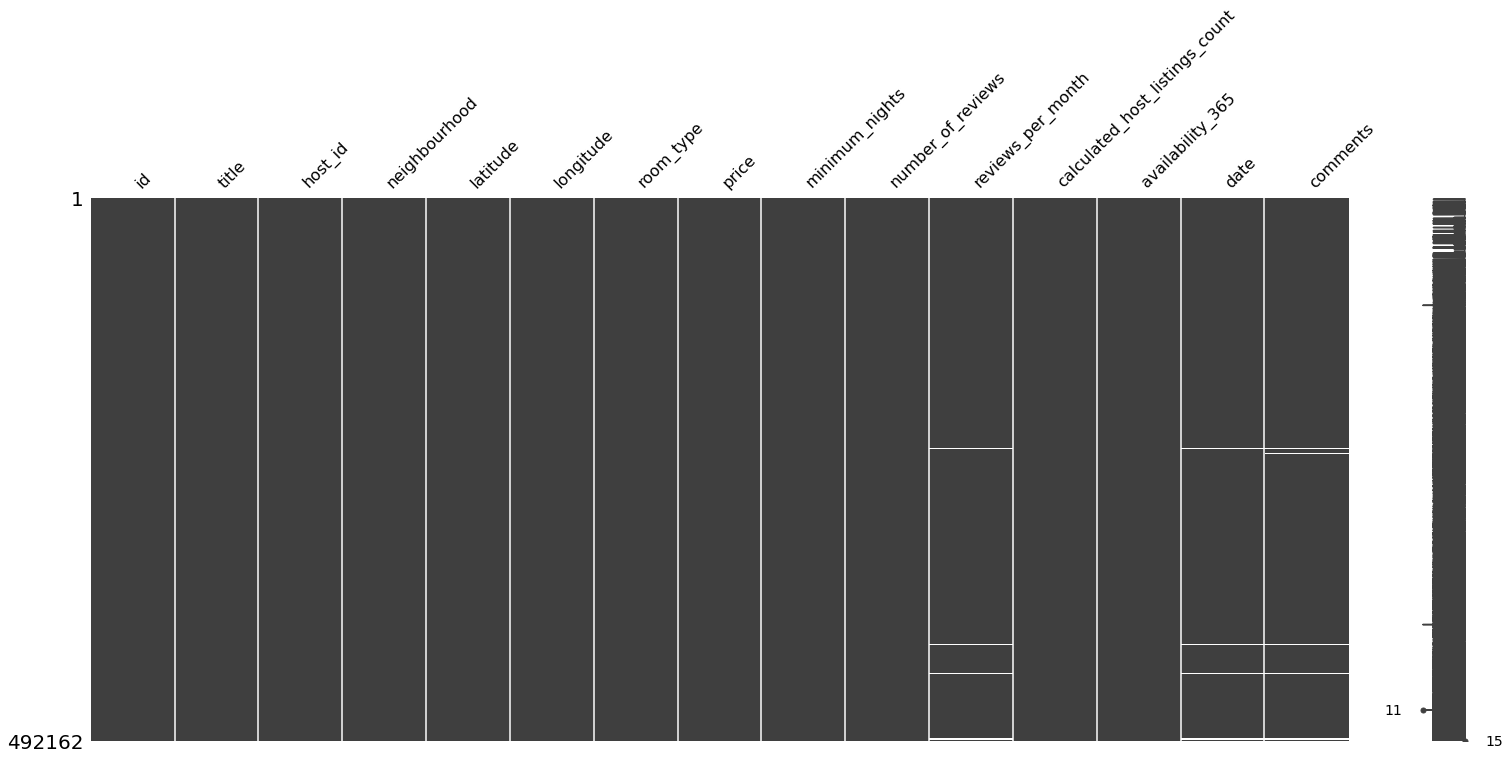

In [19]:
## location of missing values and see we can find any correlation betwen the missing values
msno.matrix(df);

We can these all missing values are highly correlated for all these 4 columns. From above visualization it is quite evident these missing values belongs to the same observations. Since the percentage is pretty low we are going it for now

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(486317, 15)

In [22]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Textual analysis

In [23]:
df.sample(1)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
340698,17703014,Modern Nordic One Bedroom Apartment Inner City,120638451,Melbourne,-37.798496,144.952302,Entire home/apt,115,1,67,3.23,1,14,2017-06-11,Natalie's place was perfect! I would highly recommend!


### *Let's first focus on the comment section.*


## In what languages the comment are being made?

In [24]:
# !pip install langdetect

In [25]:
# ## credit: https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data/comments

# # we use Python's langdetect 
# from langdetect import detect

# # write the function that detects the language
# def language_detection(text):
#     try:
#         return detect(text)
#     except:
#         return None

In [26]:
# %%time
# df['language'] = df['comments'].apply(language_detection)

In [27]:
# # write the dataframe to a csv file in order to avoid the long runtime
# df.to_csv('processed_df', index=False)


In [28]:
df =pd.read_csv('../input/melbourne-airbnb/processed_df')

In [29]:
df.head(2)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language
0,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n",en
1,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW.",en


In [30]:
df['language'].value_counts()

en       457921
zh-cn    8726  
ko       5102  
fr       3225  
de       1660  
ro       1213  
es       1018  
so       929   
af       872   
it       511   
ca       500   
nl       454   
ja       447   
tl       273   
cs       250   
pt       240   
zh-tw    233   
pl       175   
cy       172   
no       167   
vi       163   
sv       135   
da       129   
id       115   
sw       113   
fi       109   
hu       104   
hr       88    
et       65    
sk       43    
ru       38    
sl       30    
th       30    
tr       26    
lt       9     
sq       5     
lv       3     
el       3     
ar       1     
bg       1     
Name: language, dtype: int64

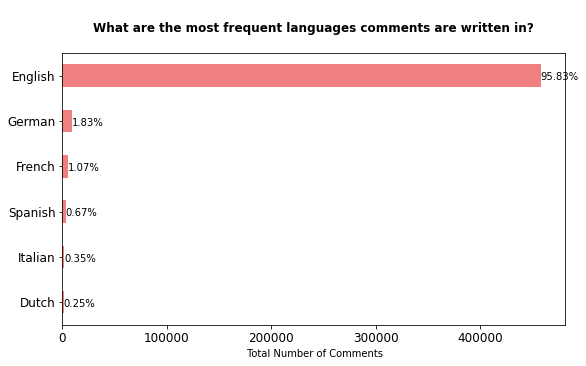

In [31]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

Since almost all the comments are in English, we will focus our analysis on these.

In [32]:
# splitting the dataframes for language 
df_eng = df[(df['language']=='en')]

In [33]:
df_eng['language'].value_counts()

en    457921
Name: language, dtype: int64

## Sentiment analysis of comments

If we can filter out the positive and negative comments we can compare what makes a listing likeable among for the tourist with respect to the the listings that are not liked.

For this we will using `VADER` package

In [34]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [35]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [36]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [37]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

Let's now have VADER produce all four scores for each of our English-language comments. As this takes roughly a quarter of an hour, it's a good idea to save the dataframe.

In [38]:
# %%time

# df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
# df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
# df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
# df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

In [39]:
# # write the dataframe to a csv file in order to avoid the long runtime
# df_eng.to_csv('sentiment_df_eng', index=False)


In [40]:
df = pd.read_csv('../input/melbourne-airbnb/sentiment_df_eng')

In [41]:
df.sample(1)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
186954,10597064,Stylish water front residence!,9496787,Port Phillip,-37.844299,144.942881,Entire home/apt,109,20,4,0.15,1,0,2016-12-09,"Close to beach, shops, restaurants and public transportation...what more could one ask for. This modern apartment was a great way place to stay at as we wrapped up our stay in Australia.",en,0.0,0.88,0.12,0.6249


### Percentage distribution of different sentiments

In [42]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    457921.000000
mean     0.836991     
std      0.233214     
min     -0.996400     
5%       0.421500     
10%      0.624000     
20%      0.778300     
30%      0.848100     
40%      0.893000     
50%      0.920400     
60%      0.941100     
70%      0.956700     
80%      0.969600     
90%      0.981000     
max      0.999600     
Name: sentiment_compound, dtype: float64

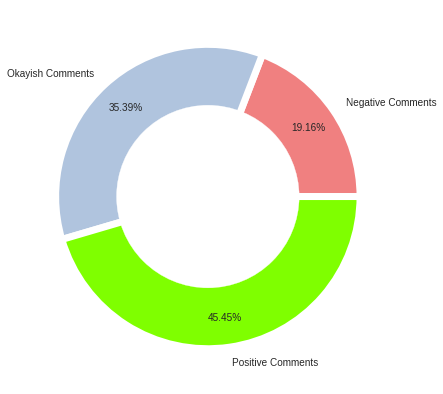

In [45]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

Now let's check how long are the positive comments and negative comments. Is there any difference in their length wrt people opinions

In [46]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()


# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [47]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

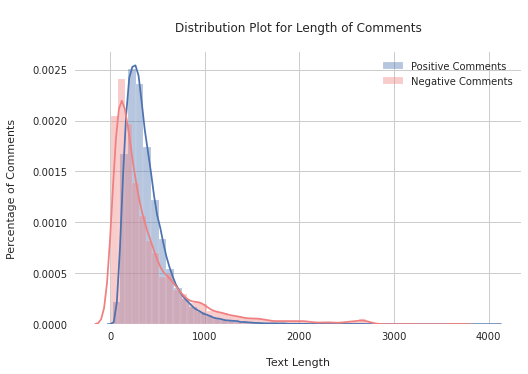

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50)
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

It can be clearly oberve that positive comments seems to be longer than the negative comments if are considereing the mode in our distribution.

## Most frequent words in comment section for all types of sentiments that contributes most to this sentiment

For this task we will be using WordClouds to get insights.


### Positive comments: What people like the most about the listings?

In [51]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud

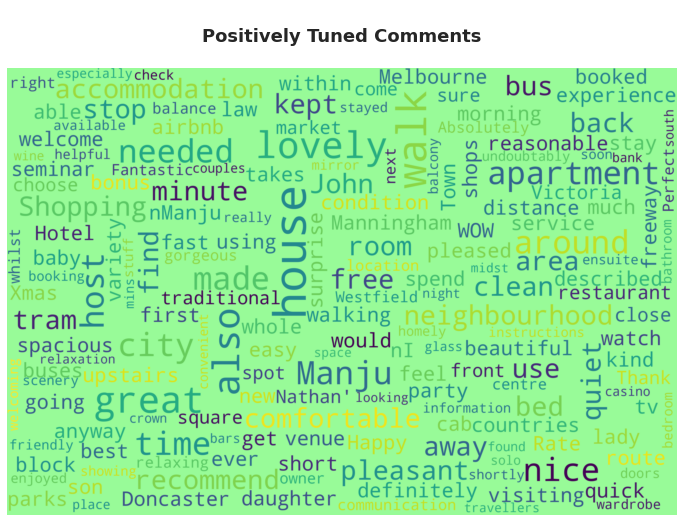

In [53]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()


wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

### Negative comments: What people complain about?

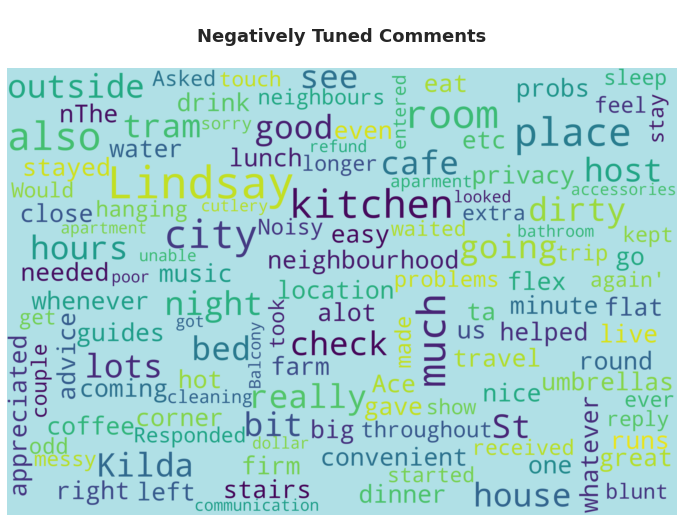

In [55]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="powderblue",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')